In [1]:
import pandas as pd
import numpy as np
 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

To predict House Price using Features

### 2. Data Gathering & Data Validation

In [2]:
boston    = load_boston()
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['PRICE'] = boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3. EDA

In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

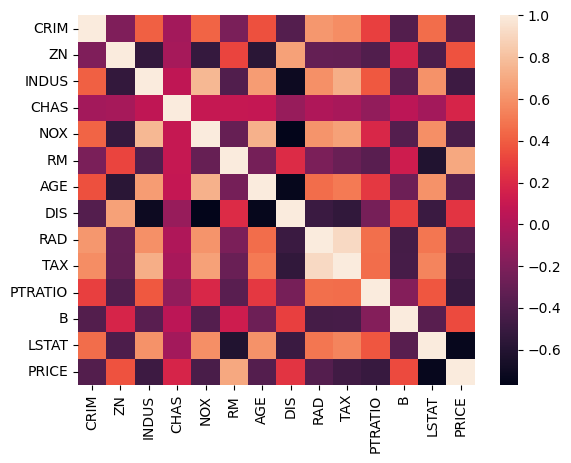

In [7]:
sns.heatmap(df_boston.corr())

### 4. Feature Engineering

### 5. Feature Selection

### 6. Model Traning & Model Testing

### KNN Regression

In [8]:
x = df_boston.drop('PRICE',axis=1)
y = df_boston['PRICE']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [9]:
x_train.shape

(404, 13)

In [10]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

### Training Dataset Evaluation

In [11]:
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE : ",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print('MAE :',mae)

r2_score_train = r2_score(y_train,y_pred_train)
print('R2 Score :',r2_score_train)


MSE :  25.247354455445542
MAE : 3.4567326732673265
R2 Score : 0.7169844162806279


### Testing Dataset Evaluation

In [12]:
y_pred_test = knn_reg.predict(x_test)

mse_test = mean_squared_error(y_test,y_pred_test)
print("MSE :",mse_test)

mae_test = mean_absolute_error(y_test,y_pred_test)
print("MAE :",mae_test)

r2_score_test = r2_score(y_test,y_pred_test)
print("R2 Score :",r2_score_test)

MSE : 39.65921568627451
MAE : 4.6968627450980405
R2 Score : 0.38422565967585365


### Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

### Training Dataset Accuracy

In [14]:
y_pred_lin = lin_reg.predict(x_train)

mse_lin_reg = mean_squared_error(y_train,y_pred_lin)
print('MSE :',mse_lin_reg)

mae_lin_reg = mean_absolute_error(y_train,y_pred_lin)
print('MAE :',mae_lin_reg)

r2_score_lin = r2_score(y_train,y_pred_lin)
print('R2 Score :',r2_score_lin)

MSE : 23.54923154474044
MAE : 3.384817335228303
R2 Score : 0.7360198858245185


### HyperParameter Tunning

In [15]:
r2_train_list = []
r2_test_list  = []
k_value = range(3,21)
for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
print('r2_test :\n',r2_train_list)
print('r2_train :\n',r2_test_list)

r2_test :
 [0.8265314570420985, 0.787048586094695, 0.7633805615340264, 0.7399007813724992, 0.7290491772443586, 0.7012906613791131, 0.6749568177832536, 0.6519291247358837, 0.6265857409670856, 0.6123182548883102, 0.6004855771685693, 0.5846057297588656, 0.5661720574738983, 0.5538156598132038, 0.5361353414071165, 0.5314812600025773, 0.5203086433612706, 0.5095470939222579]
r2_train :
 [0.49946748929798823, 0.5099032451138954, 0.5464106631658405, 0.5435159563505236, 0.595774226313009, 0.567697473605795, 0.5477794489968622, 0.5286243497492225, 0.5586704850453315, 0.5583034947210894, 0.5529294420978033, 0.5496644099343602, 0.5291398104978935, 0.5106642597490365, 0.5038253223607805, 0.4980608832645542, 0.4875057808010168, 0.4803076818346842]


Text(0.5, 1.0, 'Comparision between Train and Test Accuracy for p = 1')

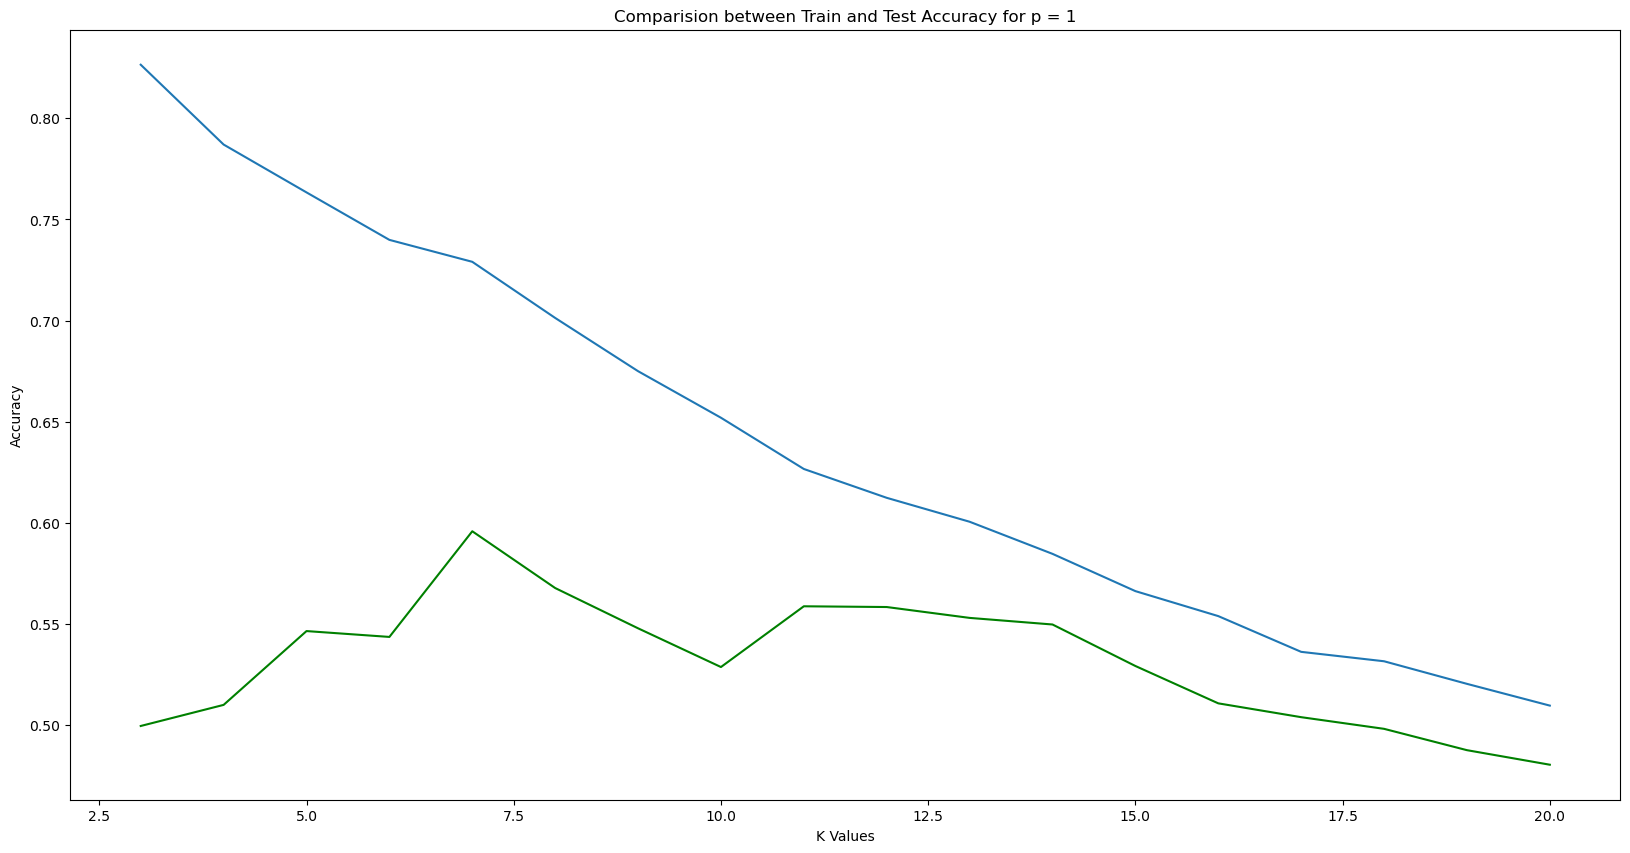

In [16]:
plt.figure(figsize=(20,10))
plt.plot(k_value,r2_test_list,color='Green')
plt.plot(k_value,r2_train_list)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Comparision between Train and Test Accuracy for p = 1')

In [17]:
r2_train_list = []
r2_test_list  = []
k_value = range(3,21)
for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    
    # Training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # Testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
print('r2_test :\n',r2_train_list)
print('r2_train :\n',r2_test_list)

r2_test :
 [0.7836421291301001, 0.7531394660417727, 0.7169844162806279, 0.698610587076185, 0.6574491548227863, 0.6337910283890933, 0.6076829157683337, 0.5878588117568122, 0.5705281024983437, 0.5644891348801062, 0.5435089742938448, 0.5270981706839519, 0.5151678374358486, 0.5008548756065386, 0.4865138262301081, 0.47086943373281387, 0.45902250119314925, 0.4502842499525632]
r2_train :
 [0.367769958958424, 0.3884137613452553, 0.38422565967585365, 0.42368412738548034, 0.4146899326816009, 0.41032915617386057, 0.4422281253940501, 0.4278908318462715, 0.42723519301657586, 0.40677088341329937, 0.3999476745905227, 0.39280821307727576, 0.36606503247245015, 0.3586206187256854, 0.34163669040504274, 0.32986675799497545, 0.3372647607443797, 0.32717680596462917]


Text(0.5, 1.0, 'Comparision between Train and Test Accuracy for p = 2')

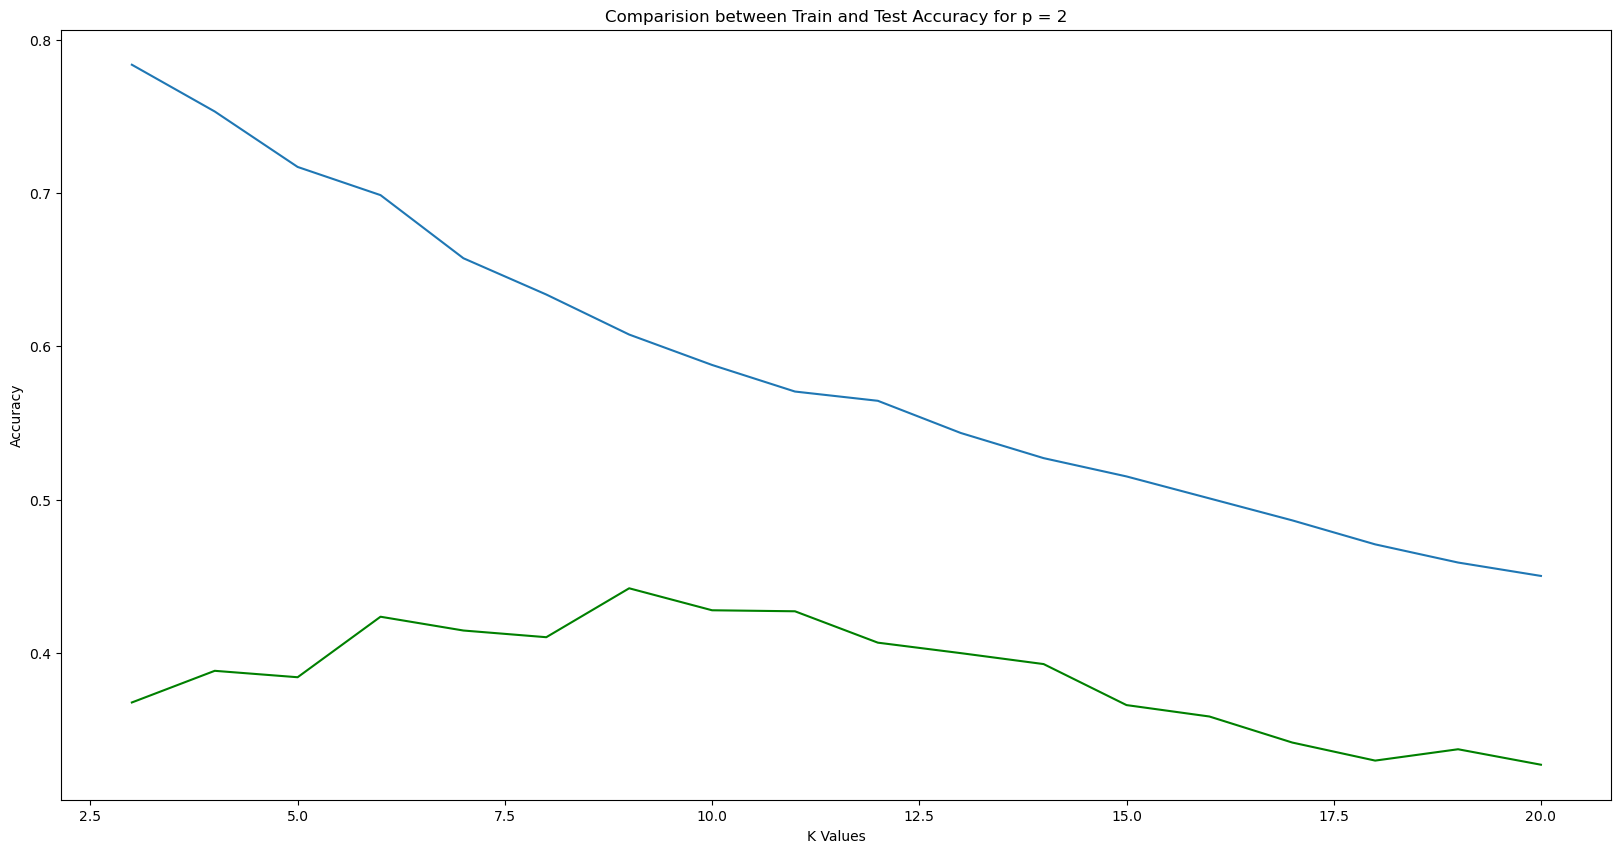

In [18]:
plt.figure(figsize=(20,10))
plt.plot(k_value,r2_test_list,color='Green')
plt.plot(k_value,r2_train_list)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Comparision between Train and Test Accuracy for p = 2')

### Feature Scaling / Feature Engineering

In [19]:
x = df_boston.drop('PRICE',axis=1)
y = df_boston['PRICE']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [20]:
x_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44


In [21]:
x_train.shape

(404, 13)

### 1. Normalization

In [22]:
# Training

norm_scalar = MinMaxScaler()
array = norm_scalar.fit_transform(x_train)
norm_train = pd.DataFrame(array,columns=x_train.columns)
norm_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.001880,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684
1,0.007265,0.200,0.128666,0.0,0.390947,0.748994,0.511843,0.158445,0.173913,0.146947,0.042553,0.983358,0.039459
2,0.000473,0.250,0.161290,0.0,0.084362,0.606630,0.315139,0.388391,0.130435,0.179389,0.680851,1.000000,0.098234
3,0.015293,0.000,0.281525,0.0,0.314815,0.412340,0.939238,0.282207,0.130435,0.229008,0.893617,0.907383,0.575883
4,0.091277,0.000,0.646628,0.0,0.674897,0.610845,0.923790,0.108576,1.000000,0.914122,0.808511,0.000000,0.433499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.255749,0.000,0.646628,0.0,0.436214,0.204445,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
400,0.008274,0.000,0.210411,0.0,0.251029,0.585744,0.802266,0.194828,0.304348,0.229008,0.510638,1.000000,0.161976
401,0.002119,0.200,0.238270,0.0,0.162551,0.513317,0.138002,0.300030,0.086957,0.068702,0.638298,1.000000,0.134106
402,0.109475,0.000,0.646628,0.0,0.409465,0.357540,0.952626,0.118233,1.000000,0.914122,0.808511,0.888244,0.452815


In [23]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(norm_train,y_train)

y_norm_pred_train = knn_reg.predict(norm_train)

mse_norm_train = mean_squared_error(y_norm_pred_train,y_train)
print('MSE :',mse_norm_train)

mae_norm_train = mean_absolute_error(y_train,y_norm_pred_train)
print('MAE :', mae_norm_train)

r2_score_norm_train = r2_score(y_train,y_norm_pred_train)
print('R2_Score :',r2_score_norm_train)

MSE : 15.271649504950492
MAE : 2.5026732673267325
R2_Score : 0.8288092003212243


In [24]:
# Testing

norm_scalar = MinMaxScaler()
array = norm_scalar.fit_transform(x_test)
norm_test = pd.DataFrame(array,columns=x_test.columns)
norm_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002586,0.000000,0.359293,0.0,0.402923,0.411958,0.630851,0.153068,0.217391,0.424686,0.767442,1.000000,0.362324
1,0.000381,0.294737,0.574067,0.0,0.150313,0.462330,0.758511,0.303014,0.130435,0.171548,0.651163,1.000000,0.278239
2,0.018519,0.000000,0.756323,0.0,1.000000,0.434516,0.971277,0.054699,0.173913,0.449791,0.244186,0.938891,0.404908
3,0.004481,0.000000,0.219189,1.0,0.240084,0.443714,0.907447,0.232511,0.304348,0.248954,0.558140,0.995791,0.670516
4,0.079146,0.000000,0.696909,0.0,0.463466,0.430355,0.841489,0.104909,1.000000,1.000000,0.883721,0.000000,0.736557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.001809,0.131579,0.286230,0.0,0.275574,0.408673,0.850000,0.673199,0.173913,0.257322,0.302326,0.974162,0.513172
98,0.084491,0.000000,0.696909,0.0,0.670146,0.499124,0.981915,0.125202,1.000000,1.000000,0.883721,0.764973,0.592927
99,0.047796,0.000000,0.696909,0.0,0.789144,0.432326,0.801064,0.165502,1.000000,1.000000,0.883721,0.984381,0.353302
100,0.001822,0.000000,0.313930,0.0,0.267223,0.371879,0.913830,0.128435,0.173913,0.410042,0.965116,0.996881,0.569470


In [25]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(norm_test,y_test)

y_norm_pred_test = knn_reg.predict(norm_test)

mse_norm_test = mean_squared_error(y_norm_pred_test,y_test)
print('MSE :',mse_norm_test)

mae_norm_test = mean_absolute_error(y_test,y_norm_pred_test)
print('MAE :', mae_norm_test)

r2_score_norm_test = r2_score(y_test,y_norm_pred_test)
print('R2_Score :',r2_score_norm_test)

MSE : 19.2165568627451
MAE : 3.0047058823529413
R2_Score : 0.7016314513362005


### HyperParameter Tunning 

Text(0.5, 1.0, 'Comparisom between Train and Test Accuracy on Normalized Dataset')

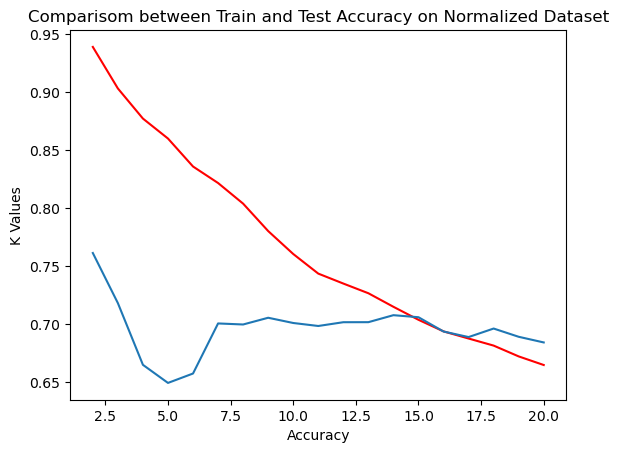

In [26]:
# on Normalized Data
# for p=1

r2_norm_train_list = []
r2_norm_test_list  = []
k_value = range(2,21)
for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(norm_train,y_train)
    
    # Training
    r2_score_norm_train = knn_reg.score(norm_train,y_train)
    r2_norm_train_list.append(r2_score_norm_train)
    
    # Testing
    r2_score_norm_test = knn_reg.score(norm_test,y_test)
    r2_norm_test_list.append(r2_score_norm_test)
    
# plt.figure(figsize=(20,10))
plt.plot(k_value,r2_norm_train_list,color='Red')
plt.plot(k_value,r2_norm_test_list)
plt.xlabel('Accuracy')
plt.ylabel('K Values')
plt.title('Comparisom between Train and Test Accuracy on Normalized Dataset')

Text(0.5, 1.0, 'Comparisom between Train and Test Accuracy on Normalized Dataset')

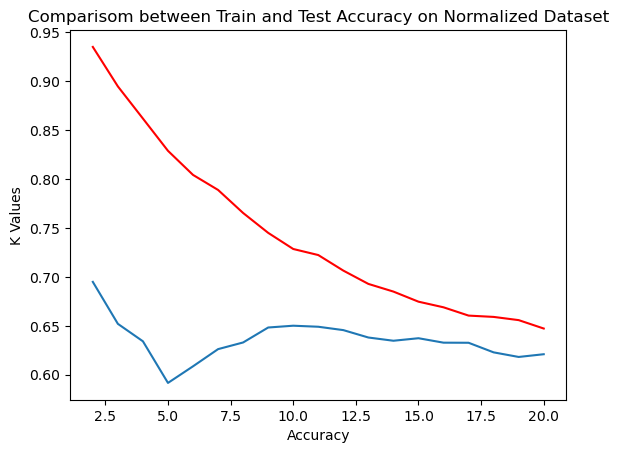

In [27]:
# on Normalized Data
# for p=2

r2_norm_train_list = []
r2_norm_test_list  = []
k_value = range(2,21)
for k in k_value:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(norm_train,y_train)
    
    # Training
    r2_score_norm_train = knn_reg.score(norm_train,y_train)
    r2_norm_train_list.append(r2_score_norm_train)
    
    # Testing
    r2_score_norm_test = knn_reg.score(norm_test,y_test)
    r2_norm_test_list.append(r2_score_norm_test)
    
# plt.figure(figsize=(20,10))
plt.plot(k_value,r2_norm_train_list,color='Red')
plt.plot(k_value,r2_norm_test_list)
plt.xlabel('Accuracy')
plt.ylabel('K Values')
plt.title('Comparisom between Train and Test Accuracy on Normalized Dataset')

### 2. Standardization

In [28]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x_train)
std_train = pd.DataFrame(array,columns=x_train.columns)
std_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.425574,0.011703,-0.473932,-0.283221,-0.250618,-0.167332,0.975932,0.991197,-0.536525,-0.598750,-1.480056,0.449696,0.896413
1,-0.376881,0.331168,-1.030702,-0.283221,0.191157,1.650555,-0.526160,-0.435850,-0.536525,-0.876716,-2.494769,0.379174,-1.288586
2,-0.438292,0.544145,-0.903644,-0.283221,-1.099518,0.609962,-1.185699,0.736336,-0.651332,-0.776175,0.272630,0.449696,-0.997526
3,-0.304285,-0.520738,-0.435387,-0.283221,-0.129346,-0.810175,0.906871,0.195046,-0.651332,-0.622407,1.195096,0.057230,1.367848
4,0.382782,-0.520738,0.986516,-0.283221,1.386548,0.640774,0.855075,-0.690062,1.644813,1.500777,0.826110,-3.787831,0.662745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1.869990,-0.520738,0.986516,-0.283221,0.381727,-2.329750,1.110603,-1.046859,1.644813,1.500777,0.826110,-3.483624,2.976193
400,-0.367756,-0.520738,-0.712344,-0.283221,-0.397876,0.457304,0.447610,-0.250382,-0.192103,-0.622407,-0.465343,0.449696,-0.681869
401,-0.423414,0.331168,-0.603845,-0.283221,-0.770353,-0.072096,-1.779630,0.285902,-0.766139,-1.119196,0.088137,0.449696,-0.819884
402,0.547335,-0.520738,0.986516,-0.283221,0.269117,-1.210727,0.951761,-0.640833,1.644813,1.500777,0.826110,-0.023871,0.758399


In [29]:
# Without hyperparameter tunning

knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train,y_train)

y_pred_std_train = knn_reg.predict(std_train)

mse_std_train = mean_squared_error(y_train,y_pred_std_train)
print('MSE :',mse_std_train)

mae_std_train = mean_absolute_error(y_train,y_pred_std_train)
print('MAE :',mae_std_train)
 
r2_score_std_train = r2_score(y_train,y_pred_std_train)
print('R2 Score :',r2_score_std_train)

MSE : 13.190643564356435
MAE : 2.3069306930693068
R2 Score : 0.8521366785344388


In [30]:
# Only do transformation for user input

std_scalar = StandardScaler()
array = std_scalar.fit_transform(x_test)
x_test_std = pd.DataFrame(array,columns=x_test.columns)
x_test_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.333495,-0.357221,-0.199042,-0.227038,0.199749,-0.366338,-0.254977,-0.702962,-0.354231,-0.008401,0.262608,0.407370,0.002688
1,-0.352694,0.900760,0.661837,-0.227038,-0.836569,-0.013100,0.238839,-0.059710,-0.585843,-0.743724,-0.206499,0.407370,-0.364441
2,-0.194773,-0.357221,1.392377,-0.227038,2.649227,-0.208149,1.061867,-1.124951,-0.470037,0.064524,-1.848377,0.108587,0.188616
3,-0.316996,-0.357221,-0.760624,4.404543,-0.468291,-0.143644,0.814958,-0.362159,-0.122618,-0.518873,-0.581786,0.386790,1.348301
4,0.333094,-0.357221,1.154227,-0.227038,0.448122,-0.237329,0.559820,-0.909556,1.730282,1.662789,0.731716,-4.482005,1.636646


In [31]:
y_pred_test_std = knn_reg.predict(x_test_std)

mse_std_test = mean_squared_error(y_test,y_pred_test_std)
print('MSE :',mse_std_test)

mae_std_test = mean_absolute_error(y_test,y_pred_test_std)
print('MAE :',mae_std_test)

r2_score_std_test = r2_score(y_test,y_pred_test_std)
print('R2 Score :',r2_score_std_test)

MSE : 22.40706666666667
MAE : 2.9364705882352946
R2 Score : 0.6520935561506571


In [32]:
knn_reg = KNeighborsRegressor(n_neighbors=6,p=1)
knn_reg.fit(std_train,y_train)

# Training
y_pred_train = knn_reg.predict(std_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)

R2_SCORE = r2_score(y_train,y_pred_train)
print("R2_score",R2_SCORE)

MSE 14.090096947194718
MAE 2.397813531353135
R2_score 0.8420540647452766


In [33]:
with open('KNN_REG_MODEL.pkl','wb')as f:
    pickle.dump(knn_reg,f)

In [34]:
with open('Scaling_std.pkl','wb')as f:
    pickle.dump(std_scalar,f)

In [35]:
list(x_test.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [36]:
columns = list(x_test.columns)
data_columns = {'Columns':columns}

In [37]:
with open('Columns_Data.json','w')as f:
    json.dump(data_columns,f)